**Building the Machine Learning Model**


**Step 1: Obtain the Dataset**

 For heart disease prediction, we'll use the UCI Heart Disease dataset, which contains various health metrics and whether patients have heart disease.

In [1]:
# train_model.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import json

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=column_names, na_values='?')

# Handle missing values
df = df.dropna()

# Convert target to binary (0 = no disease, 1 = disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Print dataset information
print(f"Dataset shape: {df.shape}")
print(df['target'].value_counts())

Dataset shape: (297, 14)
target
0    160
1    137
Name: count, dtype: int64


**Step 2: Explore and Preprocess the Data**

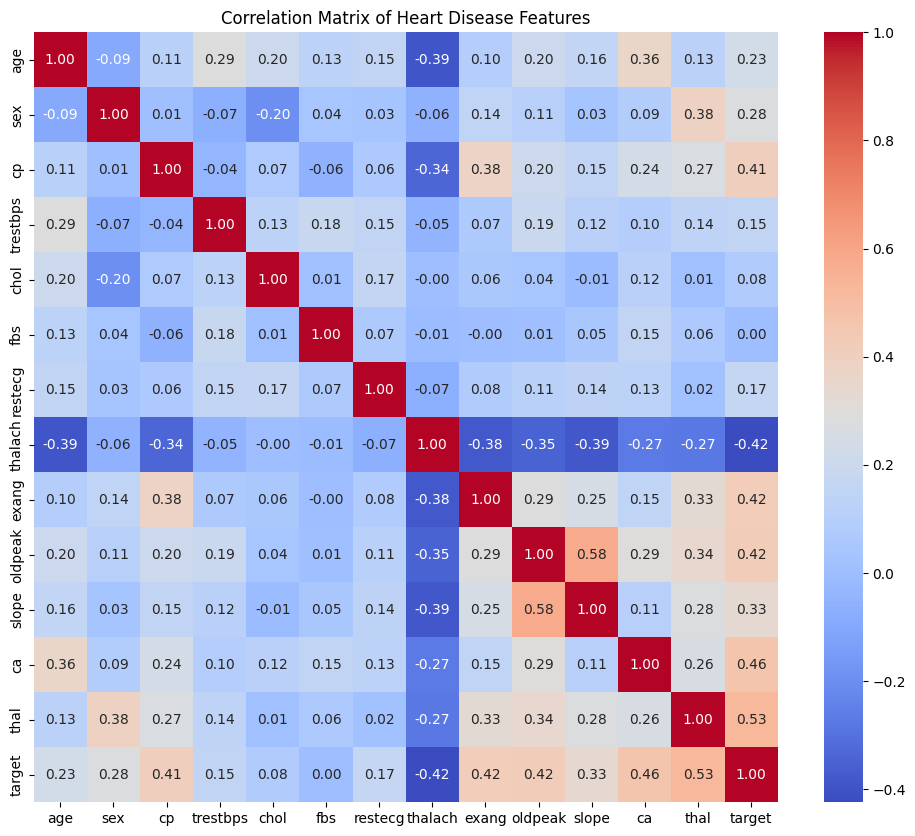

In [4]:
# Continue in train_model.py
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Heart Disease Features')

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

**Step 3: Train the Model**

Model Accuracy: 0.8833
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

Feature Importance:
     Feature  Importance
7    thalach    0.128595
11        ca    0.128311
12      thal    0.104479
9    oldpeak    0.103659
2         cp    0.103653
4       chol    0.097724
0        age    0.094957
3   trestbps    0.089756
8      exang    0.052210
10     slope    0.033971
1        sex    0.032460
6    restecg    0.016737
5        fbs    0.013488
Model trained and saved successfully!


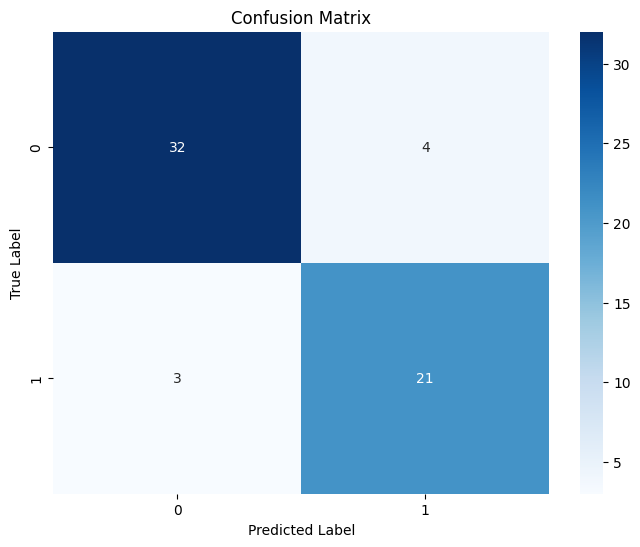

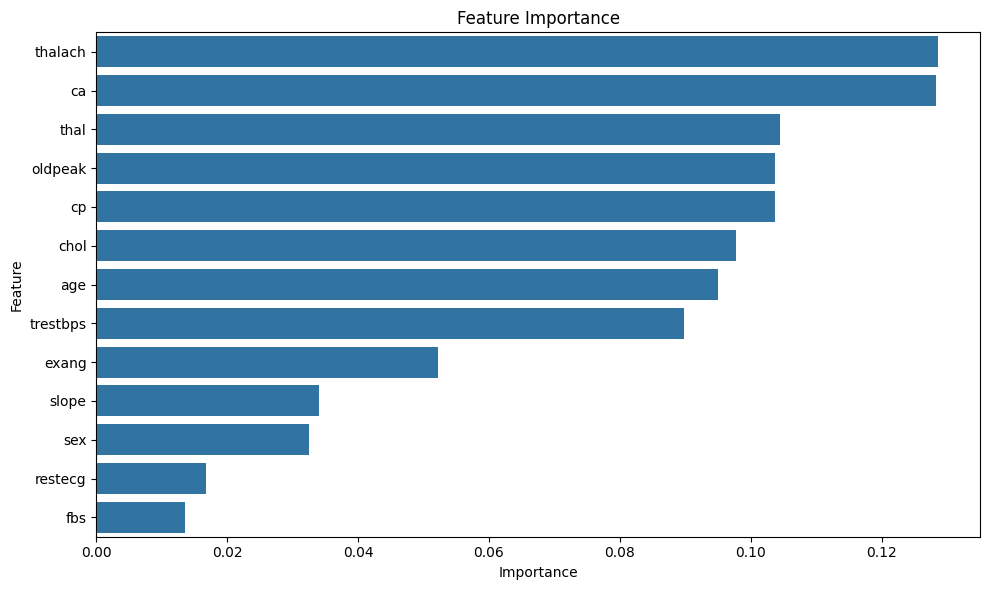

In [6]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')


# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()


# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# For JavaScript implementation, convert model to JSON
# This is a simplified example - you'll need TensorFlowJS for a real implementation
model_data = {
    'features': list(X.columns),
    'weights': [tree.feature_importances_.tolist() for tree in model.estimators_]
}

with open('model.json', 'w') as f:
    json.dump(model_data, f)

print("Model trained and saved successfully!")